https://stackoverflow.com/questions/59773795/generating-rows-of-a-rule-30-cellular-automaton

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def initial_state(width):
    initial = np.zeros((1, width), dtype=int)
    if width % 2 == 0:
        initial = np.insert(initial, int(width / 2), values=0, axis=1)
        initial[0, int(width / 2)] = 1
        return initial
    else:
        initial[0, int(width / 2)] = 1
        return initial

In [6]:
def rule30(array):
    row1 = np.pad(array,[(0,0), (1,1)], mode='constant')
    next_row = array.copy()
    for x in range(1, array.shape[0]+1):
        for y in range(1, array.shape[1]+1):
            if row1[x-1][y-1] == 1 ^ (row1[x-1][y] == 1 or row1[x-1][y+1] == 1):
                next_row[x - 1, y - 1] = 1
            else:
                next_row[x - 1, y - 1] = 0
        return np.concatenate((array, next_row))

In [2]:
def apply_rule(n):
    rv = initial_state(n)
    while rv[-1][0] == 0:
        rv = np.append(rv, rule30(rv[-1].reshape(1,-1)), axis=0)
    return rv

In [8]:
apply_rule(7)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1]])

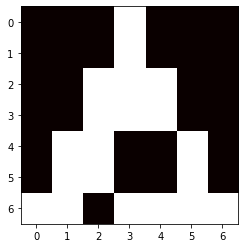

In [31]:
plt.imshow(apply_rule(7), cmap='hot')
plt.show()

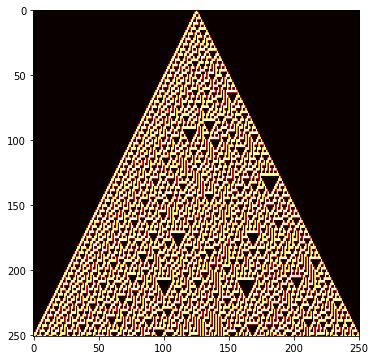

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(apply_rule(250), cmap='hot')

https://ipython-books.github.io/122-simulating-an-elementary-cellular-automaton/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
u = np.array([[4], [2], [1]])

In [16]:
def step(x, rule_b):
    """Compute a single step of an elementary cellular automaton"""
    # The columns contain the L, C, R values of all cells
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule
    return rule_b[7 - z]

In [17]:
def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given its rule (number between 0 and 255)"""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

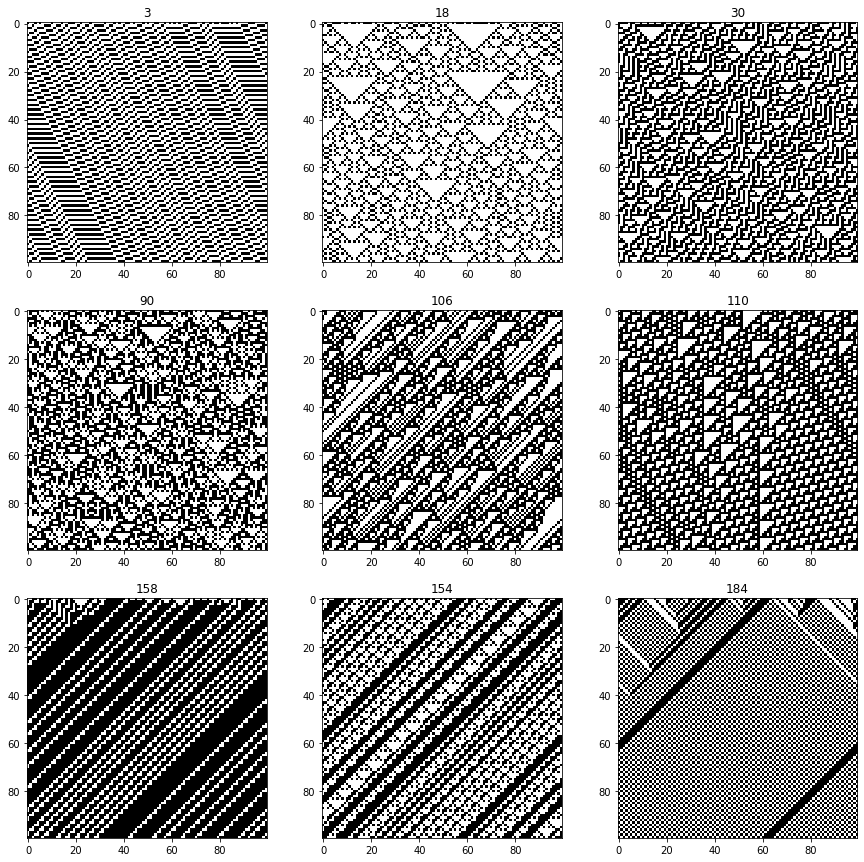

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
rules = [3, 18, 30,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    #ax.set_axis_off()
    ax.set_title(str(rule))